In [4]:
%matplotlib inline

import numpy as np
import scipy.optimize
import scipy.special
import matplotlib.pyplot as plt
import sys

def print_fl(output):
    print(output)
    sys.stdout.flush()

def get_raw_filename(sim_id, num_pol, T, F):
    return "../perm-sim-id-%s-numpol-%d-T-%.2f-F-%.2f.npz" % (sim_id, num_pol, T, F)

def get_summary_filename(sim_id, num_pol, T, F):
    return "../summaries/perm-summary-%s-numpol-%d-T-%.2f-F-%.2f.npz" % (sim_id, num_pol, T, F)

In [5]:
sim_id = "forcelowt"
num_pol = 10000

T = 0.08
Fs = np.concatenate((np.linspace(0.0, 0.1, 11), np.linspace(0.2, 1.0, 9), np.linspace(1.25, 3.50, 10)))

In [6]:
r_e2es = np.zeros((len(Fs)))
x_e2es = np.zeros((len(Fs)))

for i in range(len(Fs)):
    with np.load(get_summary_filename(sim_id, num_pol, T, Fs[i])) as data:
        r_e2es[i] = data["r_e2e"][-1]
        x_e2es[i] = data["x_e2e"][-1]

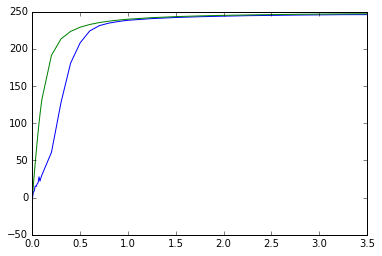

In [9]:
pf2_curve = lambda FE: scipy.special.iv(1, FE) / scipy.special.iv(0, FE)

d = 1.0

plt.plot(Fs, x_e2es, label=r"simulation at $T$ = 0.08")
plt.plot(Fs, 250*pf2_curve(Fs*d/T), label=r"model prediction for 2D FJC")

plt.xlabel()